
차종별 Term당 금액 통계:
        amount_per_term                         
                   mean      min      max  count
product                                         
K1              1910.73  1365.00  8575.00  39134
K2              1613.58  1215.00  5575.00   8995
K3              1596.10  1515.00  3525.00   2082
K4              2265.73  2015.00  6325.00    327
K5              3070.42  2792.31  3253.85    645
K6              4857.69  4761.54  5530.77    120
nan             1615.00  1615.00  1615.00      1

연령대별 Term당 금액 통계:
               amount_per_term                       
                          mean     min     max  count
temp_age_group                                       
100대                   2465.56  1515.0  5575.0      6
20대                    1826.26  1315.0  8050.0   4239
30대                    1846.31  1315.0  8050.0   8838
40대                    1842.61  1215.0  8575.0  11099
50대                    1852.79  1215.0  8050.0   9218
60대                    1865.21  1315.0  8

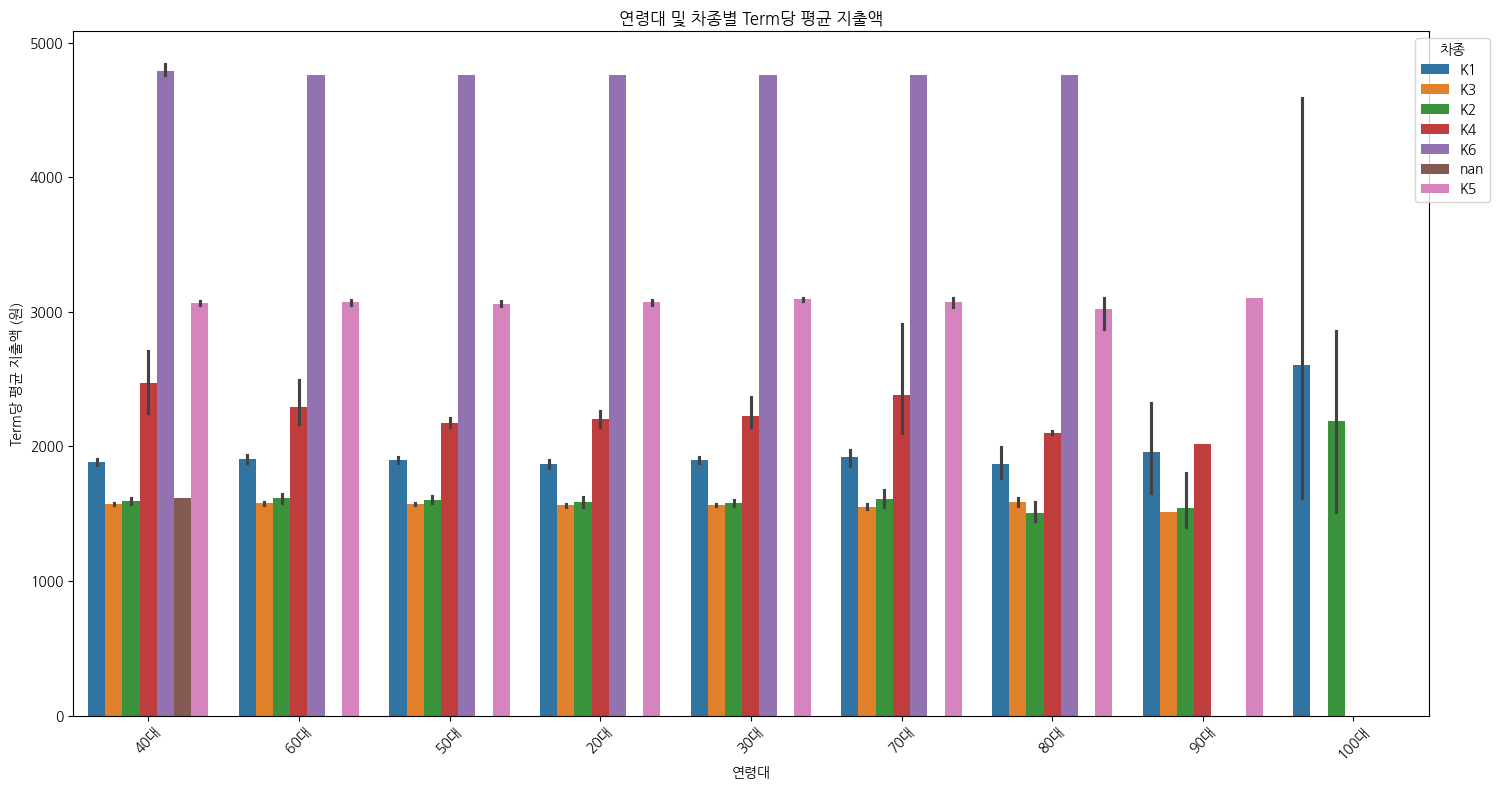

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic)

plt.rc('font', family='NanumGothic')  # 나눔고딕 폰트 사용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
rentAcar = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
rentAcar.head()

# 1. 데이터 전처리 함수
def get_age_group(age):
    if pd.isna(age) or age == 'Unknown':
        return 'Unknown'
    age = int(float(age))
    return f"{(age//10)*10}대"

# 2. 데이터 처리
rentAcar['product'] = rentAcar['product'].astype(str)
rentAcar['temp_age_group'] = rentAcar['age'].apply(get_age_group)
rentAcar['amount_per_term'] = rentAcar['amount'] / rentAcar['Term']

# 3. 차종별 통계
product_stats = rentAcar.groupby('product').agg({
    'amount_per_term': ['mean', 'min', 'max', 'count']
}).round(2)

print("\n차종별 Term당 금액 통계:")
print("="*50)
print(product_stats)

# 4. 연령대별 통계
age_stats = rentAcar[rentAcar['temp_age_group'] != 'Unknown'].groupby('temp_age_group').agg({
    'amount_per_term': ['mean', 'min', 'max', 'count']
}).round(2)

print("\n연령대별 Term당 금액 통계:")
print("="*50)
print(age_stats)

# 5. 각 차종별 상위/하위 25% 연령대 분포 분석
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    
    print(f"\n{product} 차종 분석:")
    print("="*50)
    
    # Term당 amount 기준으로 상위/하위 25% 구분
    top_25_mask = product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)
    bottom_25_mask = product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)
    
    # 연령대별 분포 계산
    top_25_age_dist = product_data[top_25_mask]['temp_age_group'].value_counts(normalize=True) * 100
    bottom_25_age_dist = product_data[bottom_25_mask]['temp_age_group'].value_counts(normalize=True) * 100
    
    print("\n상위 25% 연령대 분포 (%):")
    print(top_25_age_dist.round(2))
    print("\n하위 25% 연령대 분포 (%):")
    print(bottom_25_age_dist.round(2))

# 6. 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=rentAcar[rentAcar['temp_age_group'] != 'Unknown'], 
            x='temp_age_group', y='amount_per_term', hue='product')
plt.title('연령대 및 차종별 Term당 평균 지출액')
plt.xlabel('연령대')
plt.ylabel('Term당 평균 지출액 (원)')
plt.xticks(rotation=45)
plt.legend(title='차종', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


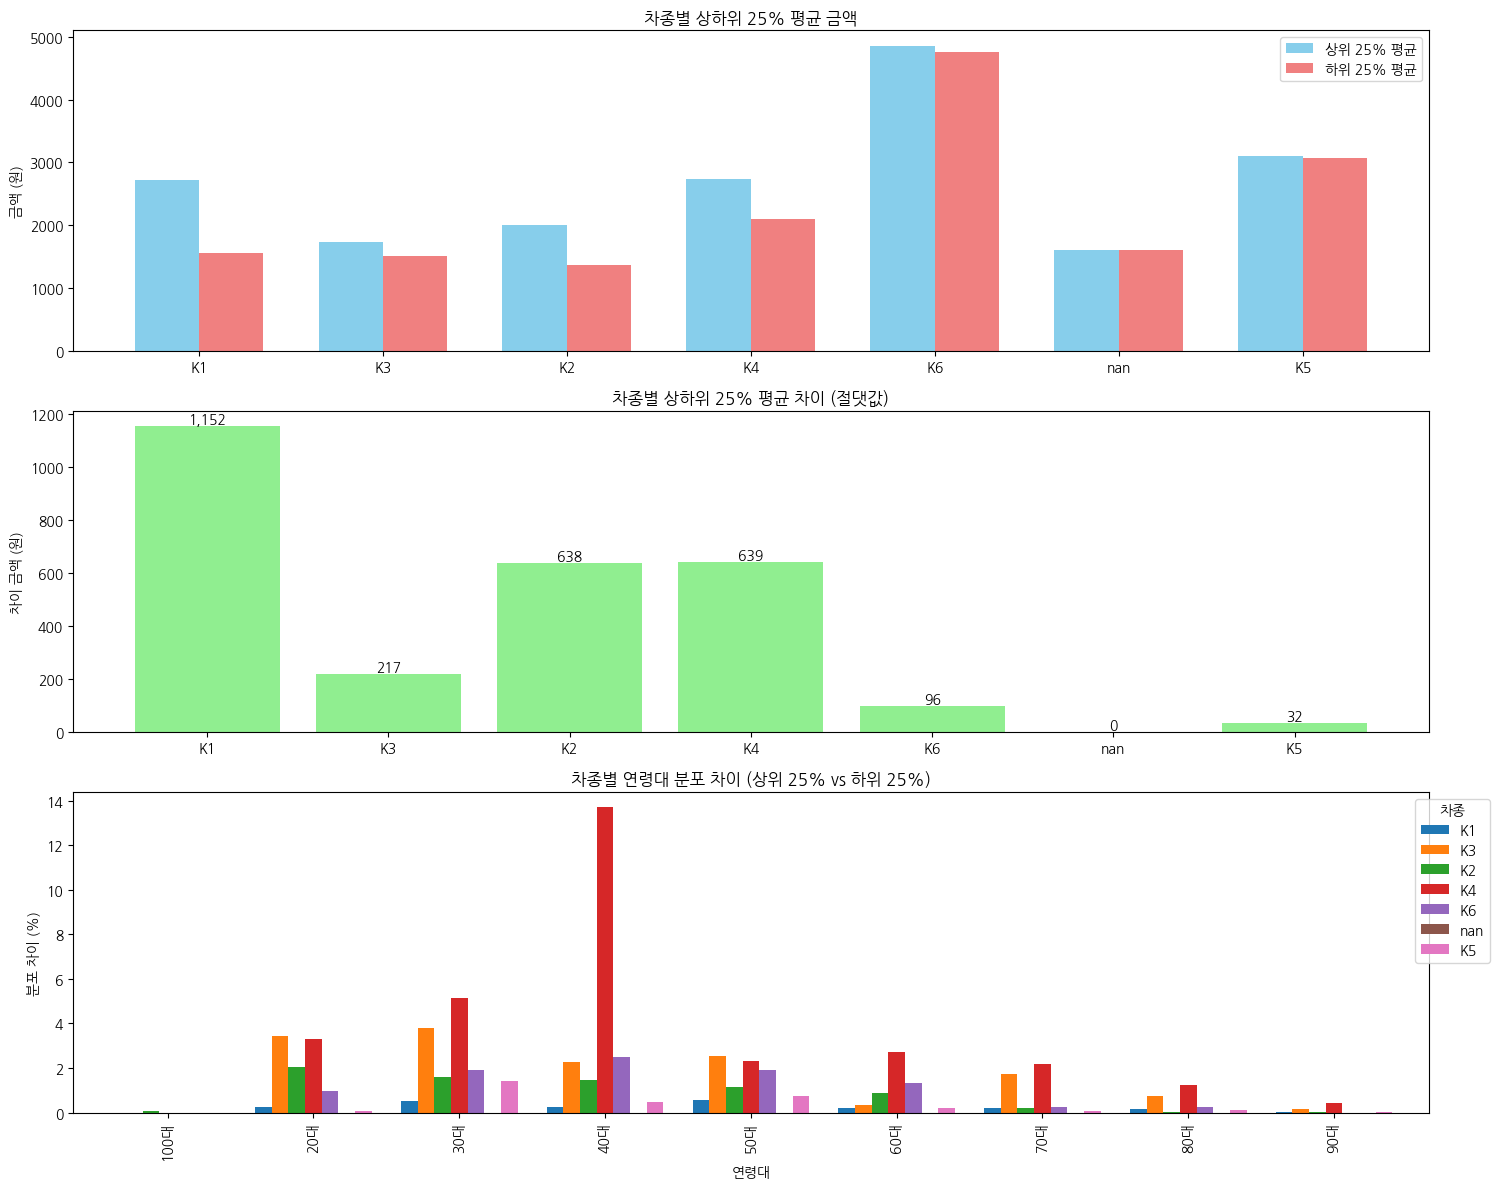


차종별 상하위 25% 통계:

K1 차종:
상위 25% 평균: 2,715.09원
하위 25% 평균: 1,563.29원
차이 (절댓값): 1,151.80원

K3 차종:
상위 25% 평균: 1,731.83원
하위 25% 평균: 1,515.00원
차이 (절댓값): 216.83원

K2 차종:
상위 25% 평균: 2,002.07원
하위 25% 평균: 1,363.60원
차이 (절댓값): 638.47원

K4 차종:
상위 25% 평균: 2,740.83원
하위 25% 평균: 2,101.50원
차이 (절댓값): 639.33원

K6 차종:
상위 25% 평균: 4,857.69원
하위 25% 평균: 4,761.54원
차이 (절댓값): 96.15원

nan 차종:
상위 25% 평균: 1,615.00원
하위 25% 평균: 1,615.00원
차이 (절댓값): 0.00원

K5 차종:
상위 25% 평균: 3,101.33원
하위 25% 평균: 3,068.99원
차이 (절댓값): 32.34원


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리 함수
def get_age_group(age):
    if pd.isna(age) or age == 'Unknown':
        return 'Unknown'
    age = int(float(age))
    return f"{(age//10)*10}대"

# 2. 데이터 처리
rentAcar['product'] = rentAcar['product'].astype(str)
rentAcar['temp_age_group'] = rentAcar['age'].apply(get_age_group)
rentAcar['amount_per_term'] = rentAcar['amount'] / rentAcar['Term']

# 3. 차종별 상하위 25% 차이 분석
results = []
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    
    # Term당 amount 기준으로 상위/하위 25% 구분
    top_25_values = product_data['amount_per_term'][product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)]
    bottom_25_values = product_data['amount_per_term'][product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)]
    
    # 상위 25%와 하위 25%의 평균값 차이 계산 (절댓값)
    diff = abs(top_25_values.mean() - bottom_25_values.mean())
    
    results.append({
        'product': product,
        'top_mean': top_25_values.mean(),
        'bottom_mean': bottom_25_values.mean(),
        'difference': diff
    })

# 4. 시각화
plt.figure(figsize=(15, 12))

# 첫 번째 그래프: 차종별 상하위 25% 평균값
ax1 = plt.subplot(3, 1, 1)
df_results = pd.DataFrame(results)
x = np.arange(len(df_results['product']))
width = 0.35

ax1.bar(x - width/2, df_results['top_mean'], width, label='상위 25% 평균', color='skyblue')
ax1.bar(x + width/2, df_results['bottom_mean'], width, label='하위 25% 평균', color='lightcoral')
ax1.set_title('차종별 상하위 25% 평균 금액')
ax1.set_ylabel('금액 (원)')
ax1.set_xticks(x)
ax1.set_xticklabels(df_results['product'])
ax1.legend()

# 두 번째 그래프: 차종별 상하위 25% 차이
ax2 = plt.subplot(3, 1, 2)
ax2.bar(df_results['product'], df_results['difference'], color='lightgreen')
ax2.set_title('차종별 상하위 25% 평균 차이 (절댓값)')
ax2.set_ylabel('차이 금액 (원)')
for i, v in enumerate(df_results['difference']):
    ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# 세 번째 그래프: 연령대별 분포 차이
ax3 = plt.subplot(3, 1, 3)
age_diffs = pd.DataFrame()
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    top_25_age_dist = product_data[product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)]['temp_age_group'].value_counts(normalize=True) * 100
    bottom_25_age_dist = product_data[product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)]['temp_age_group'].value_counts(normalize=True) * 100
    
    all_age_groups = pd.Index(sorted(set(top_25_age_dist.index) | set(bottom_25_age_dist.index)))
    top_25_age_dist = top_25_age_dist.reindex(all_age_groups, fill_value=0)
    bottom_25_age_dist = bottom_25_age_dist.reindex(all_age_groups, fill_value=0)
    
    age_diffs[product] = abs(top_25_age_dist - bottom_25_age_dist)

age_diffs = age_diffs[age_diffs.index != 'Unknown']  # Unknown 제외
age_diffs.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('차종별 연령대 분포 차이 (상위 25% vs 하위 25%)')
ax3.set_xlabel('연령대')
ax3.set_ylabel('분포 차이 (%)')
ax3.legend(title='차종', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# 5. 상세 통계 출력
print("\n차종별 상하위 25% 통계:")
print("="*70)
for result in results:
    print(f"\n{result['product']} 차종:")
    print(f"상위 25% 평균: {result['top_mean']:,.2f}원")
    print(f"하위 25% 평균: {result['bottom_mean']:,.2f}원")
    print(f"차이 (절댓값): {result['difference']:,.2f}원")
